In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

pd.options.display.max_columns = 200

In [2]:
df = pd.read_csv(r'C:\Users\amrit\Desktop\final-project\Affordable_Housing.csv')
df.fillna(0,inplace=True)
df.head(500)

,State,Congressional_District,Active_Loans,AVG_Borrower_Gross_Income,Very Low Income,Low Income,Moderate Income,AVG_Debt_Ratio,Indian_Alaskian,Asian,Black,Hawaiian,White,Hispanic,Married,AVG_No_of_Dependent,Average Hshld Size,First Time Home Buyer,Average Borrower Age,Disability,PUD,Condo,Coop,Unknown HSG Proj Type,Detached Structure,Attached Structure,Unknown Stucture,Manufactured Homes,AVG_Living _Area(Square Ft),AVG_Request_Amount,AVG_Loan_Amount,AVG_LTV,AVG_Appraised_Value
0,AK,0.0,"2,926","72,337.58",131,954,"1,674",0.0,187,132,19,24,"2,578",118,"1,456",0.9,2.3,"2,325",37.0,10,151,89,3,"2,683","2,405",124,397,0,"1,314","194,095.12","188,640.94",0.98,"194,897.50"
1,AL,1.0,"3,543","52,733.67",43,347,"3,110",0.0,19,17,481,9,"3,023",90,"1,562",0.7,2.2,"3,076",37.0,18,727,7,6,"2,803","3,427",16,100,2,"1,644","126,428.67","125,783.28",0.99,"127,057.33"
2,AL,2.0,"2,922","50,266.44",69,368,"2,449",0.0,9,13,447,5,"2,459",67,"1,274",0.8,2.2,"2,449",37.0,15,145,0,0,"2,777","2,754",58,110,0,"1,559","115,463.04","114,710.70",0.98,"117,104.11"
3,AL,3.0,"3,496","50,301.94",79,441,"2,942",0.0,4,4,534,10,"2,952",48,"1,526",0.7,2.1,"2,946",37.0,22,452,1,1,"3,042","3,336",33,127,0,"1,556","117,638.11","117,095.52",0.98,"119,519.66"
4,AL,4.0,"4,699","48,225.72",152,683,"3,789",0.0,12,23,137,4,"4,525",164,"2,309",0.7,2.1,"3,786",37.0,30,116,1,1,"4,581","4,417",32,250,0,"1,543","105,005.81","104,266.75",0.98,"106,572.83"
5,AL,5.0,"5,689","51,169.88",226,987,"4,328",0.0,22,31,923,11,"4,715",113,"2,470",0.6,2.0,"4,473",37.0,35,670,0,2,"5,017","5,352",20,317,0,"1,634","124,417.89","123,088.99",0.99,"124,698.76"
6,AL,6.0,"3,089","51,401.42",43,339,"2,694",0.0,7,10,521,3,"2,554",49,"1,238",0.6,2.1,"2,631",37.0,16,916,0,2,"2,171","2,957",85,47,0,"1,522","126,391.64","126,199.54",0.99,"127,522.36"
7,AL,7.0,"1,662","52,095.04",23,138,"1,493",0.0,0,3,584,0,"1,075",21,563,0.7,2.0,"1,481",37.0,10,370,0,0,"1,292","1,619",21,22,0,"1,643","133,849.86","133,469.65",0.99,"135,197.01"
8,AL,14.0,1,"56,784.00",0,0,1,0.0,0,0,0,0,1,0,1,0.0,1.0,1,38.0,0,0,0,0,1,1,0,0,0,"1,236","134,464.00","134,464.00",1.01,"133,000.00"
9,AR,1.0,"8,427","46,224.40",261,"1,314","6,679",0.0,17,21,829,11,"7,544",118,"4,017",0.8,2.2,"6,692",38.0,88,141,0,5,"8,281","7,492",224,711,0,"1,483","95,931.72","95,124.99",0.98,"97,768.51"


In [3]:
test = df[['AVG_Borrower_Gross_Income','AVG_Request_Amount', 'State', 'Asian']]

test["AVG_Borrower_Gross_Income"] = test['AVG_Borrower_Gross_Income'].str.replace(",","")
test["AVG_Borrower_Gross_Income"] = test.loc[:, "AVG_Borrower_Gross_Income"].astype(float)

test["AVG_Request_Amount"] = test['AVG_Request_Amount'].str.replace(",","")
test["AVG_Request_Amount"] = test.loc[:, "AVG_Request_Amount"].astype(float)

C:\Users\amrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\amrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\amrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [4]:
import matplotlib
cmap = matplotlib.colors.Colormap('jet', N=test.State.nunique())

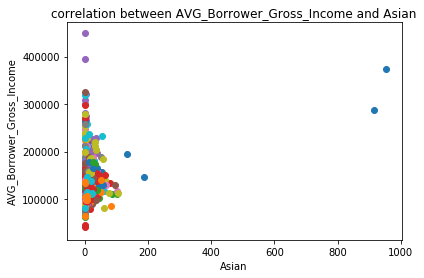

In [5]:
for i in test.State.unique():
    plt.scatter(test[test.State == i].Asian, test[test.State == i].AVG_Request_Amount, cmap=cmap);
    plt.title("correlation between AVG_Borrower_Gross_Income and Asian")
plt.xlabel("Asian")
plt.ylabel("AVG_Borrower_Gross_Income")
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split

In [7]:
test = test.dropna()

X = test[['AVG_Borrower_Gross_Income', 'Asian']].values
Y = test.AVG_Request_Amount.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=0)

In [8]:
clf = LR()

In [9]:
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7312736048841946